# Analysation of latency data
In this notebook we want to analyse all the latency data



### what do i want to analyse?
- distribution of latency
- correlation between input size and latency measures

In [20]:
from utils import *
import pandas as pd
from pathlib import Path

## 1) Load Dataset

In [18]:
# Define root results directory
results_dir = Path('../results')

# Find all files containing "stats" and ending with .csv in all subdirectories
stats_files = sorted(results_dir.glob('**/*stats*.csv'))

# Find all files containing "raw" and ending with .csv in all subdirectories
raw_files = sorted(results_dir.glob('**/*raw*.csv'))

print(f"Found {len(stats_files)} stats CSV files and {len(raw_files)} raw CSV files:")

# Load all stats files into a dictionary of dataframes
stats_dfs = {}
for file_path in stats_files:
    try:
        df = pd.read_csv(file_path)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        # Create key: subfolder_name/filename_stem
        relative_path = file_path.relative_to(results_dir)
        key = str(relative_path.parent / relative_path.stem)
        stats_dfs[key] = df
        print(f"✅ {relative_path} -> shape {df.shape}")
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

# Load all raw files into a dictionary of dataframes
raw_dfs = {}
for file_path in raw_files:
    try:
        df = pd.read_csv(file_path)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        # Create key: subfolder_name/filename_stem
        relative_path = file_path.relative_to(results_dir)
        key = str(relative_path.parent / relative_path.stem)
        raw_dfs[key] = df
        print(f"✅ {relative_path} -> shape {df.shape}")
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

print(f"\n✅ Loaded {len(stats_dfs)} stats dataframes and {len(raw_dfs)} raw dataframes ✅")

Found 25 stats CSV files and 25 raw CSV files:
✅ cloud\cloud_stats_experiment_anthropic-claude-haiku-4-5_always_cloud_once-per-sec_2025-12-05T10-35-38.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_google-gemini-2-5-flash-always_cloud_once_per_sec_2025-12-05T10-00-00.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_google-gemma-3n-e4b-it_always_cloud_once-per-sec_2025-12-05T08-07-39.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_ibm-granite-granite-4-0-h-micro_always_cloud_once-per-sec_2025-12-05T07-07-33.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_meta-llama-llama-3-2-3b-instruct_always_cloud_once-per-sec_2025-12-05T07-31-00.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_openai-gpt-4o-mini_always_cloud_once-per-sec_2025-12-05T07-18-02.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_qwen-qwen3-8b_always_cloud_once-per-sec_2025-12-05T0

In [19]:
raw_dfs['fabian\\raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45']

,dataset_item_id,route,latency_ms,total_latency_ms,queueing_time_ms,inference_time_ms,exact_match,ground_truth,answer,job_start_ts,...,inference_end_ts,prompt,number_of_words,number_of_characters,experiment_start_time_ms,experiment_end_time_ms,route_strategy,pattern,device_model,cloud_model
0,1,device,1303.0,1315.0,12.0,1303.0,0,False,True,1764793996842,...,1764793998157,Question: does ethanol take more energy make t...,245,1674,1764793996734,1764794505074,always_device,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,meta-llama/llama-3.2-1b-instruct
1,1,device,796.0,1016.0,220.0,796.0,0,False,True,1764793997960,...,1764793998976,Question: does ethanol take more energy make t...,245,1674,1764793996734,1764794505074,always_device,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,meta-llama/llama-3.2-1b-instruct
2,2,device,806.5,831.0,25.0,806.0,1,True,True,1764793998963,...,1764793999794,Question: is house tax and property tax are sa...,219,1507,1764793996734,1764794505074,always_device,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,meta-llama/llama-3.2-1b-instruct
3,3,device,338.5,349.0,10.0,339.0,1,True,True,1764793999974,...,1764794000323,Question: is pain experienced in a missing bod...,85,654,1764793996734,1764794505074,always_device,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,meta-llama/llama-3.2-1b-instruct
4,4,device,508.7,520.0,11.0,509.0,1,True,True,1764794000983,...,1764794001503,Question: is harry potter and the escape from ...,117,880,1764793996734,1764794505074,always_device,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,meta-llama/llama-3.2-1b-instruct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,device,587.2,713.0,126.0,587.0,1,True,true,1764794498516,...,1764794499229,Question: was when i see you again written for...,147,1001,1764793996734,1764794505074,always_device,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,meta-llama/llama-3.2-1b-instruct
496,496,device,566.0,574.0,8.0,566.0,1,True,True,1764794499526,...,1764794500100,Question: is there gonna be a new halloween mo...,148,1058,1764793996734,1764794505074,always_device,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,meta-llama/llama-3.2-1b-instruct
497,497,device,476.3,487.0,11.0,476.0,1,True,true,1764794500538,...,1764794501025,Question: is bayern munich the same as bayern ...,104,770,1764793996734,1764794505074,always_device,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,meta-llama/llama-3.2-1b-instruct
498,498,device,343.8,348.0,4.0,344.0,1,True,True,1764794501552,...,1764794501900,Question: does the florida constitution give a...,66,520,1764793996734,1764794505074,always_device,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,meta-llama/llama-3.2-1b-instruct


In [9]:
# Check the keys in raw_dfs
print("Available keys in raw_dfs:")
for key in raw_dfs.keys():
    print(key)

Available keys in raw_dfs:
fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00
fabian/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45
fabian/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-03T22-46-10
nicolas/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58
nicolas/lenovo_büro_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T12-44-34
nicolas/lenovo_büro_raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T12-29-10
philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53
philip/raw_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-04T10-12-42
philip/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T08-01-13
philip/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T09-03-29


## 2) Inference Time vs. Accuracy

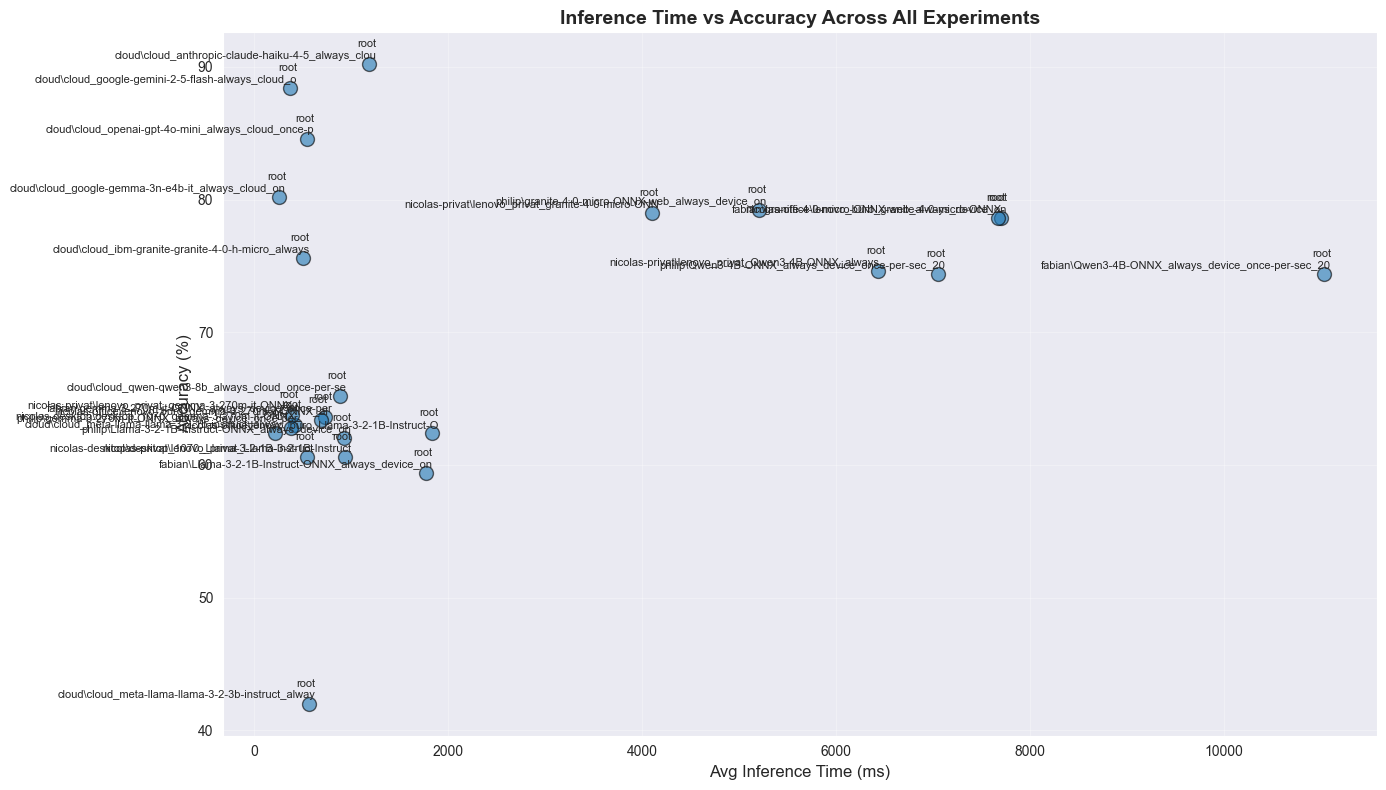

In [21]:
# Call the function with the stats_dfs dictionary
# TODO: shorten the labels (maybe just "granite micro" instead of ibm-granite-granite-4-0-h-micro). Would do this with a lookup table. Maybe add directly on data loading step.
# TODO: color the dots based on cloud vs. on device
# TODO: optional: make the size of the dots depending on the model size
scatterplot_inference_vs_accuracy(stats_dfs)

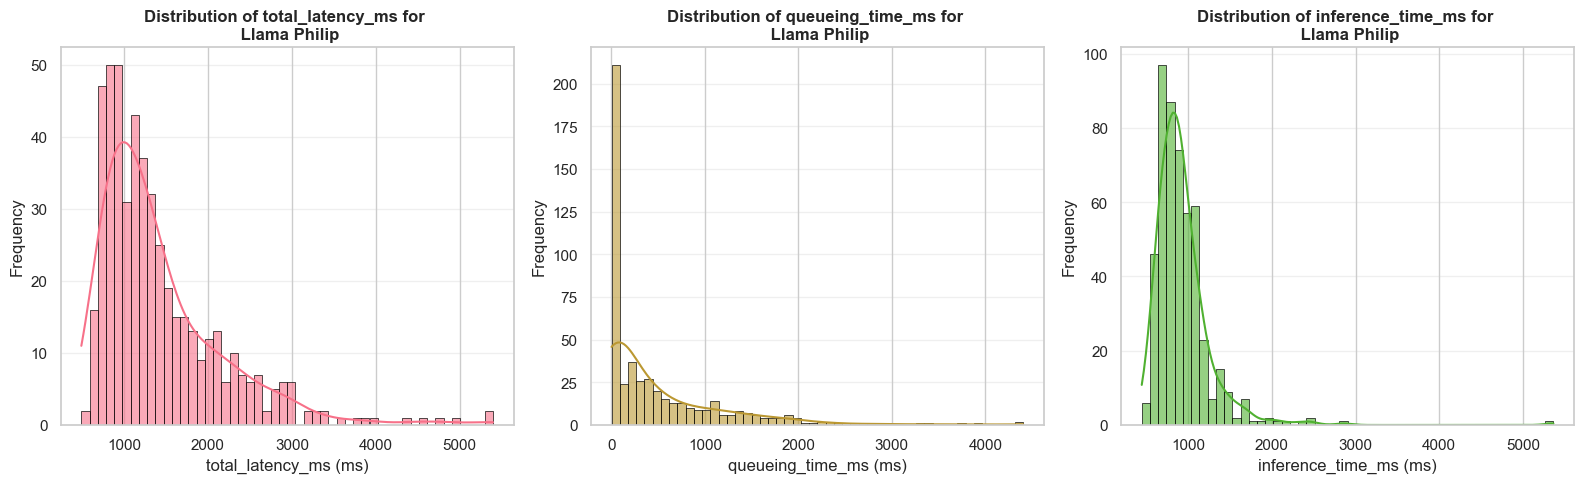

In [26]:
# plot_time_measure_distributions(raw_dfs['fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'], 'Llama Fabian')
plot_time_measure_distributions(raw_dfs['philip\\raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'], 'Llama Philip')
#plot_time_measure_distributions(raw_dfs['nicolas/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58'], 'Llama Nicolas Büro')


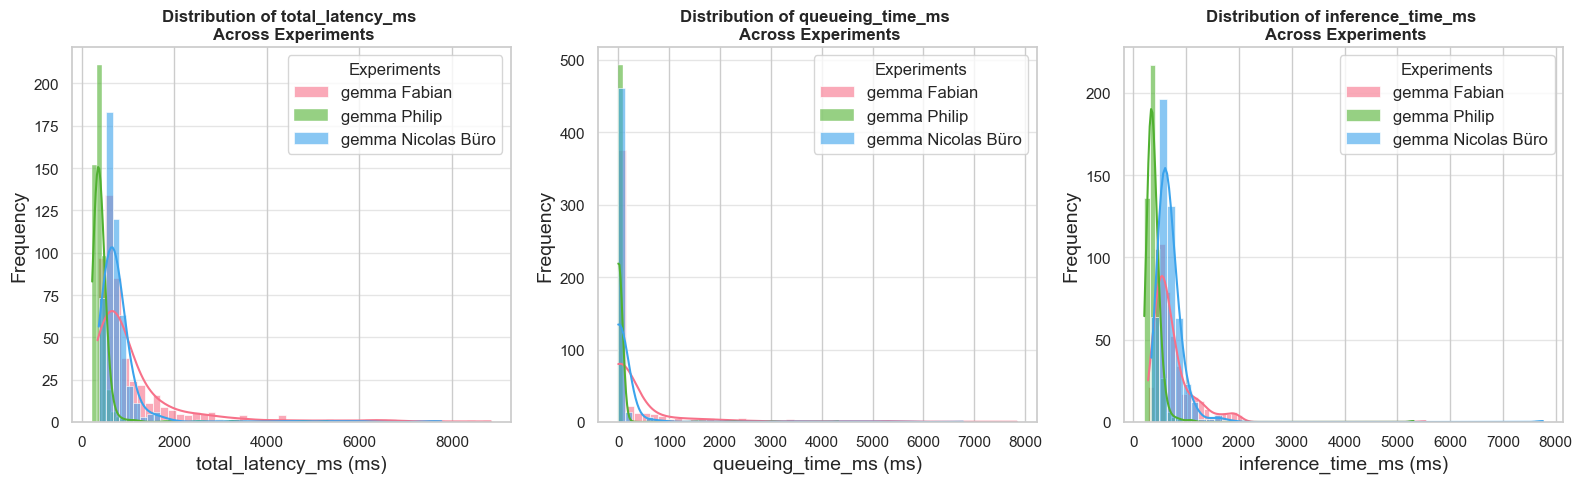

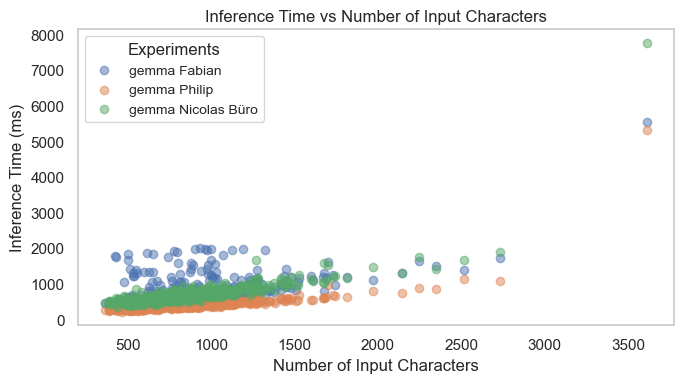

Correlation between number of characters and inference time for gemma Fabian: 0.554725204746592
Correlation between number of characters and inference time for gemma Philip: 0.7049180635731209
Correlation between number of characters and inference time for gemma Nicolas Büro: 0.7526063197711612


In [12]:
# Prepare the data for plotting
experiment_data = [
    raw_dfs['fabian/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45'],
    raw_dfs['philip/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T08-01-13'],
    raw_dfs['nicolas/lenovo_büro_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T12-44-34']
]

labels = ['gemma Fabian', 'gemma Philip', 'gemma Nicolas Büro']

# plot time measure distributions
plot_time_measures_overlaid(experiment_data, labels)

# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels)

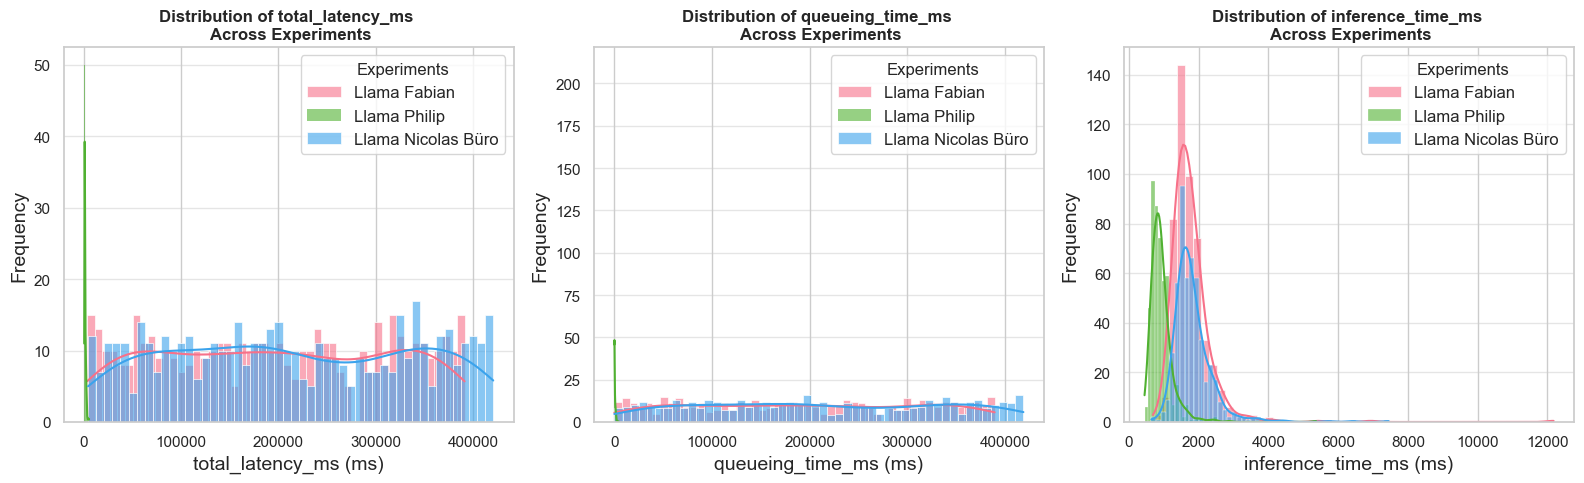

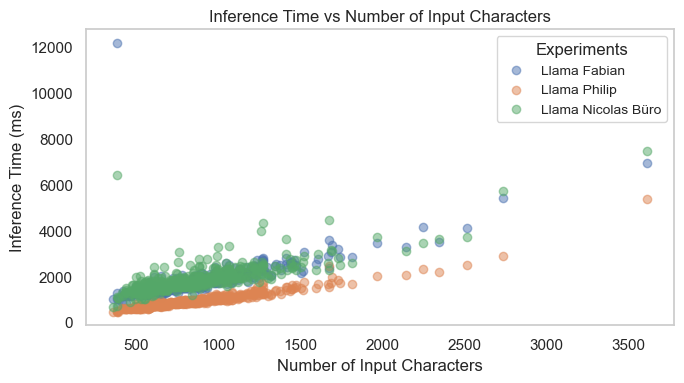

Correlation between number of characters and inference time for Llama Fabian: 0.6595012838309482
Correlation between number of characters and inference time for Llama Philip: 0.9475230235867872
Correlation between number of characters and inference time for Llama Nicolas Büro: 0.7711670339595154


In [13]:
# Prepare the data for plotting
experiment_data = [
    raw_dfs['fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'],
    raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'],
    raw_dfs['nicolas/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58']
]

labels = ['Llama Fabian', 'Llama Philip', 'Llama Nicolas Büro']

# plot time measure distributions
plot_time_measures_overlaid(experiment_data, labels)

# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels)

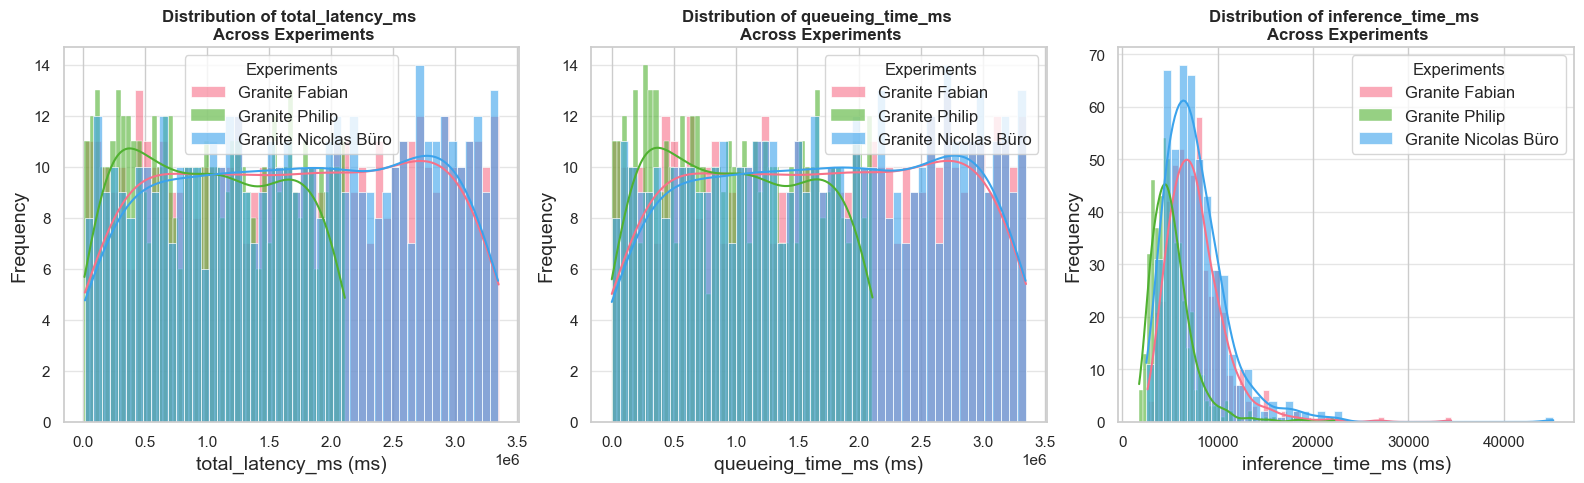

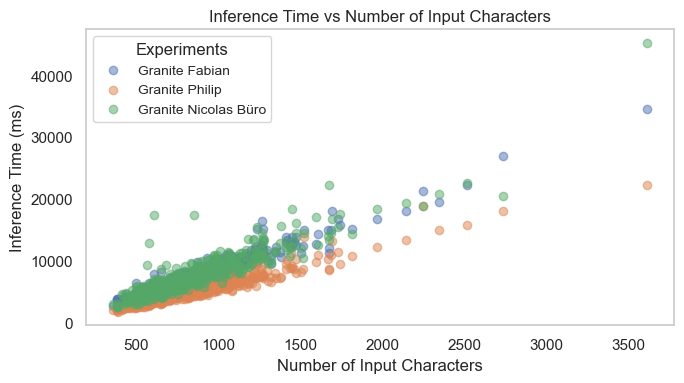

Correlation between number of characters and inference time for Granite Fabian: 0.9656557198442164
Correlation between number of characters and inference time for Granite Philip: 0.9535457786861865
Correlation between number of characters and inference time for Granite Nicolas Büro: 0.9125806954552317


In [16]:
# Prepare the data for plotting
experiment_data_granite = [
    raw_dfs['fabian/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-03T22-46-10'],  # Updated key for Fabian
    raw_dfs['philip/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T09-03-29'],  # Correct key for Philip
    raw_dfs['nicolas/lenovo_büro_raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T12-29-10']  # Correct key for Nicolas
]

labels_granite = ['Granite Fabian', 'Granite Philip', 'Granite Nicolas Büro']

# Plot time measure distributions for Granite experiments
plot_time_measures_overlaid(experiment_data_granite, labels_granite)

# Plot inference vs input character amount for Granite experiments
plot_characters_vs_inference_time(experiment_data_granite, labels_granite)

## n) Analyisis of Latency per Model and Device
This analyiss is used to show the mean and median latency as well as the variance in latency for the on device models of different configurations. Those numbers can be copied to the report.

In [30]:
# filter raw_df such that only entries with fabian in the path are kept
fabian_raw_dfs = {key: df for key, df in raw_dfs.items() if 'fabian' in key}

In [55]:
# python
def analyze_latency_statistics_for_one_device(name: str) -> pd.DataFrame:
    # filter all the raw dataframes which contain name in their key (e.g. 'fabian' for all datasets from fabian)
    subset_raw_df = {key: df for key, df in raw_dfs.items() if name in key}

    latency_stats = {}
    for key, df in subset_raw_df.items():
        if 'inference_time_ms' not in df.columns:
            continue

        series = df['inference_time_ms'].dropna()
        mean_latency = series.mean()
        median_latency = series.median()
        std_latency = series.std()
        q25 = series.quantile(0.25)
        q75 = series.quantile(0.75)
        iqr_latency = q75 - q25

        mean_accuracy = df['exact_match'].mean() if 'exact_match' in df.columns else None
        device_model = df['device_model'].iloc[0] if 'device_model' in df.columns and len(df['device_model']) > 0 else key


        latency_stats[device_model] = {
            'mean_latency_ms': round(mean_latency, 2),
            'median_latency_ms': round(median_latency, 2),
            'std_latency_ms': round(std_latency, 2),
            'iqr_latency_ms': round(iqr_latency, 2),
            'q25_latency_ms': round(q25, 2),
            'q75_latency_ms': round(q75, 2),
            'mean_accuracy': round(mean_accuracy, 2),
            'dataset_name': key
        }

    # convert to a dataframe
    return pd.DataFrame.from_dict(latency_stats, orient='index')


In [56]:
# print the dataframe
analyze_latency_statistics_for_one_device('fabian')

,mean_latency_ms,median_latency_ms,std_latency_ms,iqr_latency_ms,q25_latency_ms,q75_latency_ms,mean_accuracy,dataset_name
onnx-community/gemma-3-270m-it-ONNX,737.04,615.0,412.31,330.00,488.75,818.75,0.64,fabian\raw_experiment_gemma-3-270m-it-ONNX_alw...
onnx-community/granite-4.0-micro-ONNX-web,7697.68,7186.5,3188.96,3321.00,5633.75,8954.75,0.79,fabian\raw_experiment_granite-4-0-micro-ONNX-w...
onnx-community/Llama-3.2-1B-Instruct-ONNX,1773.50,1638.0,708.28,513.75,1436.50,1950.25,0.59,fabian\raw_experiment_Llama-3-2-1B-Instruct-ON...
onnx-community/Qwen3-4B-ONNX,11032.70,10638.0,4203.47,4612.75,8359.00,12971.75,0.74,fabian\raw_experiment_Qwen3-4B-ONNX_always_dev...


In [ ]:
analyze_latency_statistics_for_one_device('philip')

In [ ]:
analyze_latency_statistics_for_one_device('nicolas-privat')